# Agglomerative hierarchical clustering (聚合式階層分群法 , bottom-up)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# 生成3000個sample data
Generate 3000 samples

In [3]:
# For reproducibility
np.random.seed(1000)

nb_samples = 3600

# 畫出分群後的點
Draw points after Clustering

In [4]:
def plot_clustered_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    markers = ['o', 'd', '^', 'x', '1', '2', '3', 's']
    colors = ['r', 'b', 'g', 'c', 'm', 'k', 'y', '#cccfff']

    for i in range(nb_samples):
        ax.scatter(X[i, 0], X[i, 1], marker=markers[Y[i]], color=colors[Y[i]])

    plt.show()

## 定義兩個群聚之間的距離 (3種演算法)
Define the distance between two clusters (3 types)

### Complete-linkage agglomerative algorithm (完整連結聚合演算法) :
\begin{align}
d(C_{i},C_{j})=\max_{a\in C_{i},b\in C_{j}}d(a,b)
\end{align}

### Average-linkage agglomerative algorithm (平均連結聚合演算法) :
\begin{align}
d(C_{i},C_{j})=\sum_{a\in C_{i},b\in C_{j}}\frac{d(a,b)}{|C_{i}||C_{j}|}
\end{align}

### Ward’s Minimum Variance (華德最小變異法) :
\begin{align}
d_{kl}=B_{kl}= \frac{\| \bar{x_{k}}-\bar{x_{l}}\|^2}{\frac{1}{N_k}+\frac{1}{N_l}}
\end{align}





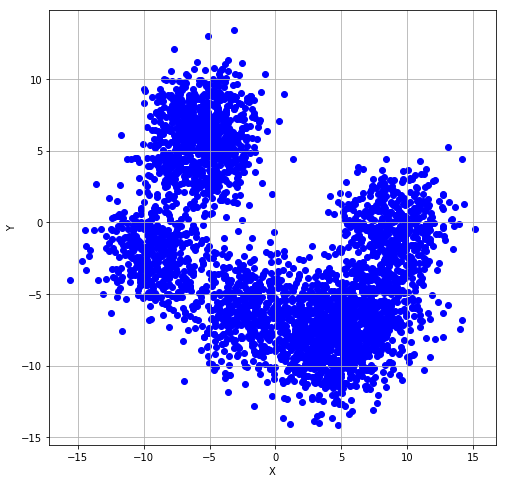

Complete linkage


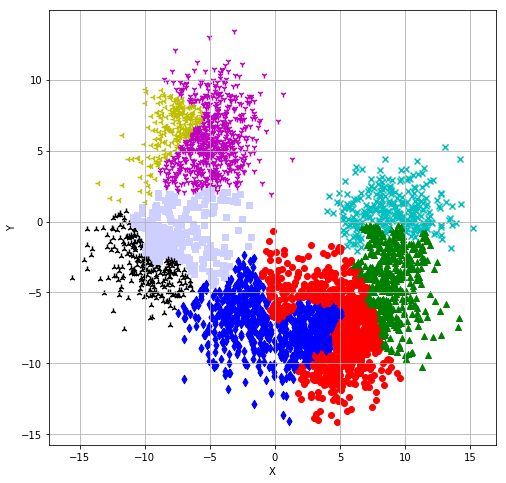

Average linkage


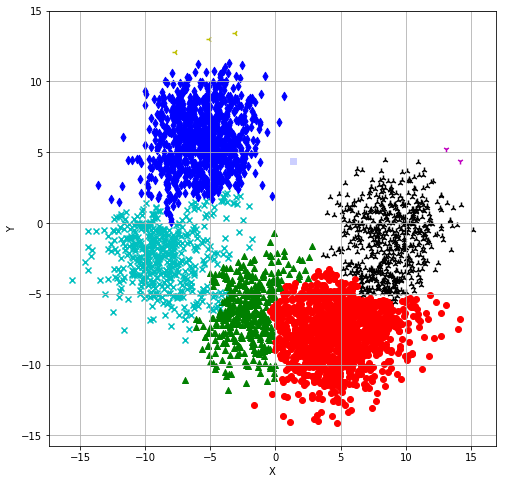

Ward linkage


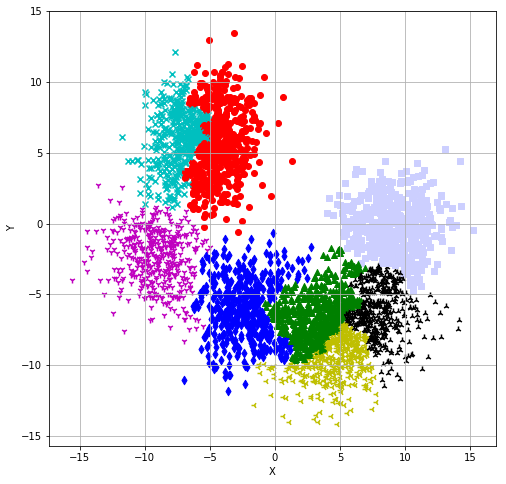

In [5]:
if __name__ == '__main__':
    # 建立高斯分佈資料集斑點
    X, _ = make_blobs(n_samples=nb_samples, n_features=2, centers=8, cluster_std=2.0)

    # 顯示資料
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.scatter(X[:, 0], X[:, 1], marker='o', color='b')
    plt.show()
    
    # 完成聚合連接
    print('Complete linkage')
    ac = AgglomerativeClustering(n_clusters=8, linkage='complete')
    Y = ac.fit_predict(X)

    # 顯示群聚資料集
    plot_clustered_dataset(X, Y)

    # 平均連接
    print('Average linkage')
    ac = AgglomerativeClustering(n_clusters=8, linkage='average')
    Y = ac.fit_predict(X)

     # 顯示群聚資料集
    plot_clustered_dataset(X, Y)

    # 沃德連接
    print('Ward linkage')
    ac = AgglomerativeClustering(n_clusters=8)
    Y = ac.fit_predict(X)

    # 顯示群聚資料集
    plot_clustered_dataset(X, Y)